# About assignment

The students will use the Auto+MPG dataset available from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset summarizes 8 features about cars. Based on
this set of 60 attributes, the main goal is trying to predict their fuel consumption.

**Pre‐processing & Descriptive Analysis:** Data should be prepared (cleaning the data) for ulterior analysis as well
as descriptive statistics should be extracted (i) to provide basic information about variables in the dataset and (ii) to
highlight potential relationships between variables. For that descriptive process, students should use tabular and/or
graphical layouts to provide measures about the centrality and variability of the data and measures of relationship
between variables.

**Prediction:** Applying regression. According to the main goal of the dataset, regression techniques should be
applied to predict the fuel consumption of the cars. Students are expected to identify those variables with highest
influence and infer the relationship between these dependent variables and the required data. Finally, the
prediction should be assessed in quality terms.

# About AUTO + MGP dataset

**This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.The dataset was used in the 1983 American Statistical Association Exposition.
(c) Date: July 7, 1993**

**Past Usage:**
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

**Relevant Information:** 
- This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute.  The original dataset is available in the file "auto-mpg.data-original". 

- "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Number of Instances:** 398

**Number of Attributes:** 9 including the class attribute

**Attribute Information:**
1. mpg :                             continuous
2. cylinders:                        multi-valued discrete
3. displacement:                     continuous
4. horsepower:                       continuous
5. weight:                           continuous
6. acceleration:                     continuous
7. model year:                       multi-valued discrete
8. origin:                           multi-valued discrete
9. car name:                         string (unique for each instance)

**Missing Attribute Values**:  horsepower has 6 missing values

**Notes about attributes:**
- MGP: miles per gallon.


- Displacement: Engine displacement (cu. inches) -> Engine displacement is the combined swept volume of the pistons inside the cylinders of an engine. It is calculated from the bore (diameter of the cylinders), stroke (distance the piston travels), and number of cylinders. Displacement is an important factor, as it has a direct impact on an engine’s power output, fuel efficiency, and in some countries, how a vehicle is taxed. The pistons inside an engine move in a reciprocating motion, that is, up and down within the cylinder, as the crankshaft rotates. The volume inside one cylinder changes as the piston moves through the combustion cycle. Simultaneously, the other cylinders change volume as their pistons move through other phases of the combustion cycle. So while volume of individual cylinders change as they reciprocate, total engine volume remains constant.


- Acceleration: the acceleration of cars in the United States is stated as a "zero to sixty" time, where vi is zero and vf is 60 miles per hour or 27 meters per second.


- Model year: model year (modulo 100), in the twentieth century.


- Origin: origin of car (1. American, 2. European, 3. Japanese).

# Import libraries

In [52]:
options(warn=0, repr.plot.width=10, repr.plot.height=7) ## Disable warnings, set size of plots.
library(ggplot2)
library(corrplot)
library(dplyr)
library(moments)

# Import  dataset from UCI Machine Learning Repository

In [2]:
auto_mgp <- read.table(file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

In [3]:
names(auto_mgp) <- c("mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", 
                     "origin", "car_name")

------------------------------------------------------------------------------------------------------------------

# Pre-processing & Descriptive Analysis

head(auto_mgp)

In [4]:
str(auto_mgp)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?","100.0","102.0",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model_year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car_name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


------------------------------------------------------------------------------------------------------------------
**Note**: we can check with str (structure of an R object) that _horsepower_ attribute is a factor with 94 levels whose one of the level is "?", this is really a missing data, so we are going to remove this rows from our dataset and convert _horsepower_ attribute to an integer.

In [5]:
## Delete rows with a horsepower column equal to "?"
auto_mgp <- auto_mgp[-which(auto_mgp$horsepower=="?"),]

## Convert horsepower column from factor to integer
auto_mgp$horsepower <- as.integer(as.character(auto_mgp$horsepower))

Also, the car name doesn't give us any information since it's only a name, not a characteristic, so we are going to delete this column

In [6]:
auto_mgp$car_name <- NULL

In [7]:
head(auto_mgp)

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
18,8,307,130,3504,12.0,70,1
15,8,350,165,3693,11.5,70,1
18,8,318,150,3436,11.0,70,1
16,8,304,150,3433,12.0,70,1
17,8,302,140,3449,10.5,70,1
15,8,429,198,4341,10.0,70,1


# Exploring data

We must remember several things:

* Mean represent the average score and frequently is not a good representative of the central tendency of a set of samples. On the other hand, median tend to represent the central tendency in a better way since this statistic is not affected by extreme values and outliers.


* The first quartile ($Q_1$) is defined as the middle number between the smallest number and the median of the data set. The second quartile ($Q_2$) is the median of the data. The third quartile ($Q_3$) is the middle value between the median and the highest value of the data set.


* Box plot: it's useful to spot any outilier observation in a variable. We must remember that have outliers in our data will affect to our prediction model. Generally, any datapoint that lies outside the 1.5 * interquartile-range (1.5 * IQR) is considered an outlier, where, IQR is calculated as the distance between the 25th percentile and 75th percentile values for that variable.


* A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable.


* A density plot try to estimate the probability density function of a set of samples and it's an alternative to histogram representation.


* Skewness and kurtosis are two commonly listed values when you run a software’s descriptive statistics function.  Many books say that these two statistics give you insights into the shape of the distribution. 

    * Skewness is a measure of the symmetry in a distribution.  A symmetrical dataset will have a skewness equal to 0.  So, a normal distribution will have a skewness of 0.   Skewness essentially measures the relative size of the two tails.
    
    * Kurtosis is a measure of the combined sizes of the two tails.  It measures the amount of probability in the tails.  The value is often compared to the kurtosis of the normal distribution, which is equal to 3.  If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).  If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails).
    
    
* Scatter plot:it's useful to visualize any linear relationships between the dependent (response) variable and independent (predictor) variables.
    
------------------------------------------------------------------------------------------------------------------

In [8]:
summary(auto_mgp)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration     model_year        origin     
 Min.   : 8.00   Min.   :70.00   Min.   :1.000  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000  
 Median :15.50   Median :76.00   Median :1.000  
 Mean   :15.54   Mean   :75.98   Mean   :1.577  
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Qu.:2.000  
 Max.   :24.80   Max.   :82.00   Max.   :3.000  

## Box plot

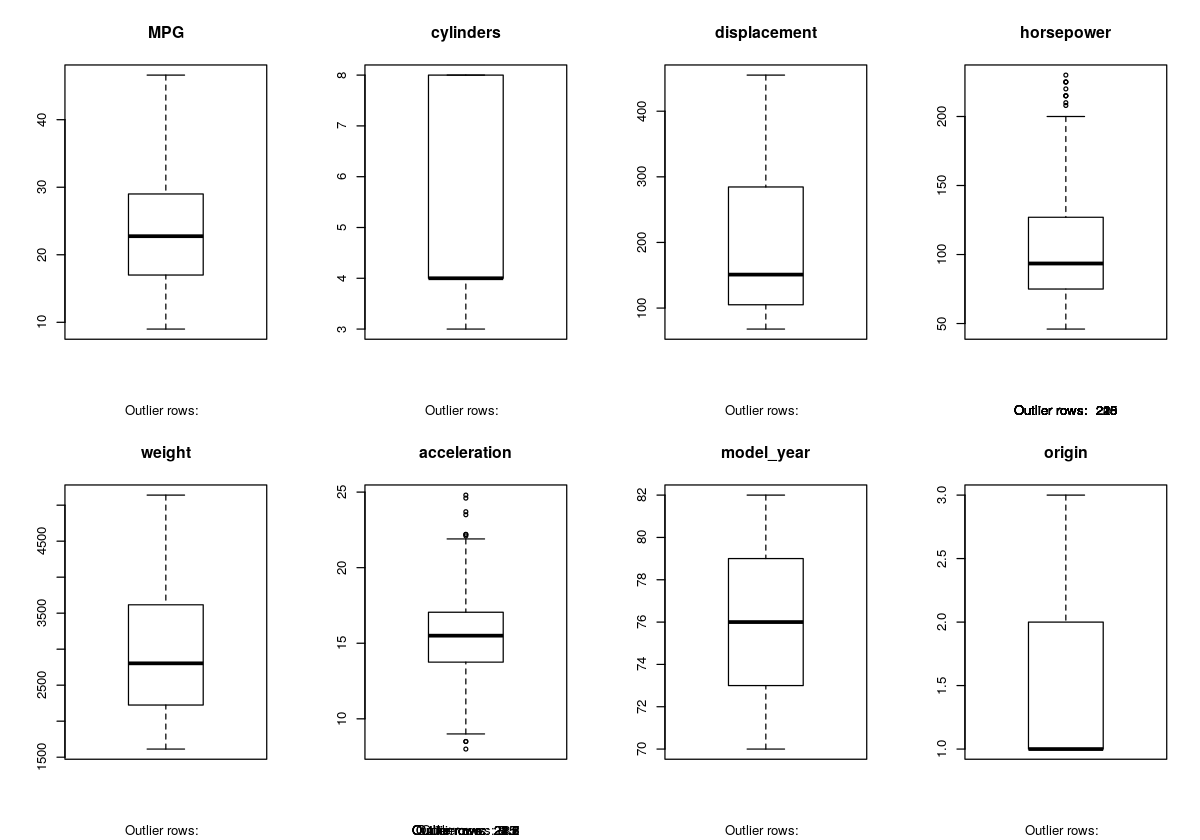

In [9]:
par(mfrow=c(2, 4))  # divide graph area in 2 columns
boxplot(auto_mgp$mpg, main="MPG", 
        sub=paste("Outlier rows: ", boxplot.stats(auto_mgp$mpg)$out))
boxplot(auto_mgp$cylinders, main="cylinders", 
        sub=paste("Outlier rows: ", boxplot.stats(auto_mgp$cylinders)$out))
boxplot(auto_mgp$displacement, main="displacement", 
        sub=paste("Outlier rows: ", boxplot.stats(auto_mgp$displacement)$out))
boxplot(auto_mgp$horsepower, main="horsepower", 
        sub=paste("Outlier rows: ", boxplot.stats(auto_mgp$horsepower)$out))
boxplot(auto_mgp$weight, main="weight", 
        sub=paste("Outlier rows: ", boxplot.stats(auto_mgp$weight)$out))
boxplot(auto_mgp$acceleration, main="acceleration", 
        sub=paste("Outlier rows: ", boxplot.stats(auto_mgp$acceleration)$out))
boxplot(auto_mgp$model_year, main="model_year", 
        sub=paste("Outlier rows: ", boxplot.stats(auto_mgp$model_year)$out))
boxplot(auto_mgp$origin, main="origin", 
        sub=paste("Outlier rows: ", boxplot.stats(auto_mgp$origin)$out))

Well, in spite of we see that **horsepower** and **acceleration** has "outilers", we suppose that this values are correct and this is probably because some car has more horsepowers and acceleration than the mean.  Really, with the set of variables that we play here, we can't say that one or other has outliers, due to are parameters of cars and the maximum and minimum values appears to have logic.

## Correlation

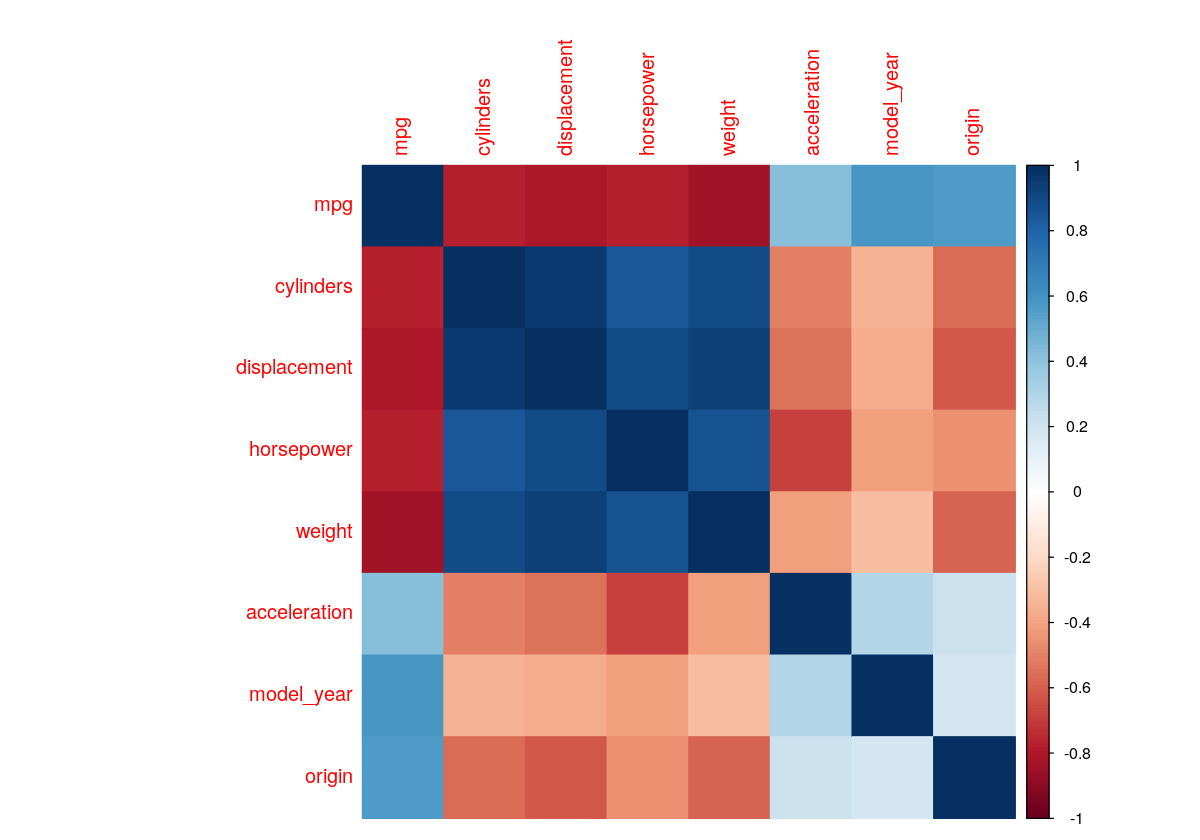

In [10]:
correlations <- cor(select(auto_mgp, mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, 
                          origin))
corrplot(correlations, method = "color")


In the figure above we can see cleary that some variables have strong positive correlation (when one increase, the other increase too) and some variables have a strong negative correlation (when one increase, the other decrease). Below we are going to analyze in detail the correlated variables with MPG and we will try to give an explanation

* MGP and cylinders has a strong negative correlation, this is due to when the number of cylinders increase, the miles per gallon decrease, since cars with a higher number of cylinders tends to consume more fuel.


* MGP and displacement the same as the previous comparation (since displacement is a consequence of the number of cylinders)


* MGP and horsepower has a strong negative correlation, this is due to when the number of horsepowers increase, the miles per gallon decrease, since cars with more horsepowers tends to consume more fuel.


* MGP and weight has a strong negative correlation, this is due to if the car is more heavyweight, it tends to consume more fuel.


* MPG and model year has a medium positive correlation, this seems that new cars tends to consume less fuel (this assumption make sense for us)


* MPG and origin has a medium positive correlation, this seems that depends on the country origin, the car consume more or less fuel, since value 1 is american'cars, 2 is european'cars and 3 is japanese'cars, it seems that american cars tends to consume more fuel than european, and european tends to consume more fuel than japanese cars. This has a lot o sense, since american'car has the know as "muscle cars" (merican term for high-performance cars, usually but not limited to rear-wheel drive and fitted with a large and powerful V8 engine).


* MPG and acceleration has a medium positive correlation, this seems that in this dataset, acceleration is maybe a not important variable in the game? (ASK TO C.)


Also, we have more correlated variables

* Cylinders and displacement has a strong positive correlation, since by meaning, if the car has more cylinder, the value of displacement will be higher.


* Cylinders and horsepower has a strong positive correlation since the horsepowers of a car depends on (amongst other things) the number of cylinders.


* Cylinders and weight: are correlated since cars with a higher number of cilinders was perhaps more weighed (SUV cars have higher number of cylinders than hatchback cars).

It's seems that the more correlated variables with  MPG are cylinders, displacement, horsepower and weight. In a bottom rung, we have model year, origin and acceleration variables. 

Now we are going to analyze separately all the variables in the game, we are going to obtain his histogram, his density plot and some estatistical values

------------------------------------------------------------------------------------------------------------------

## One variable analysis

### MPG

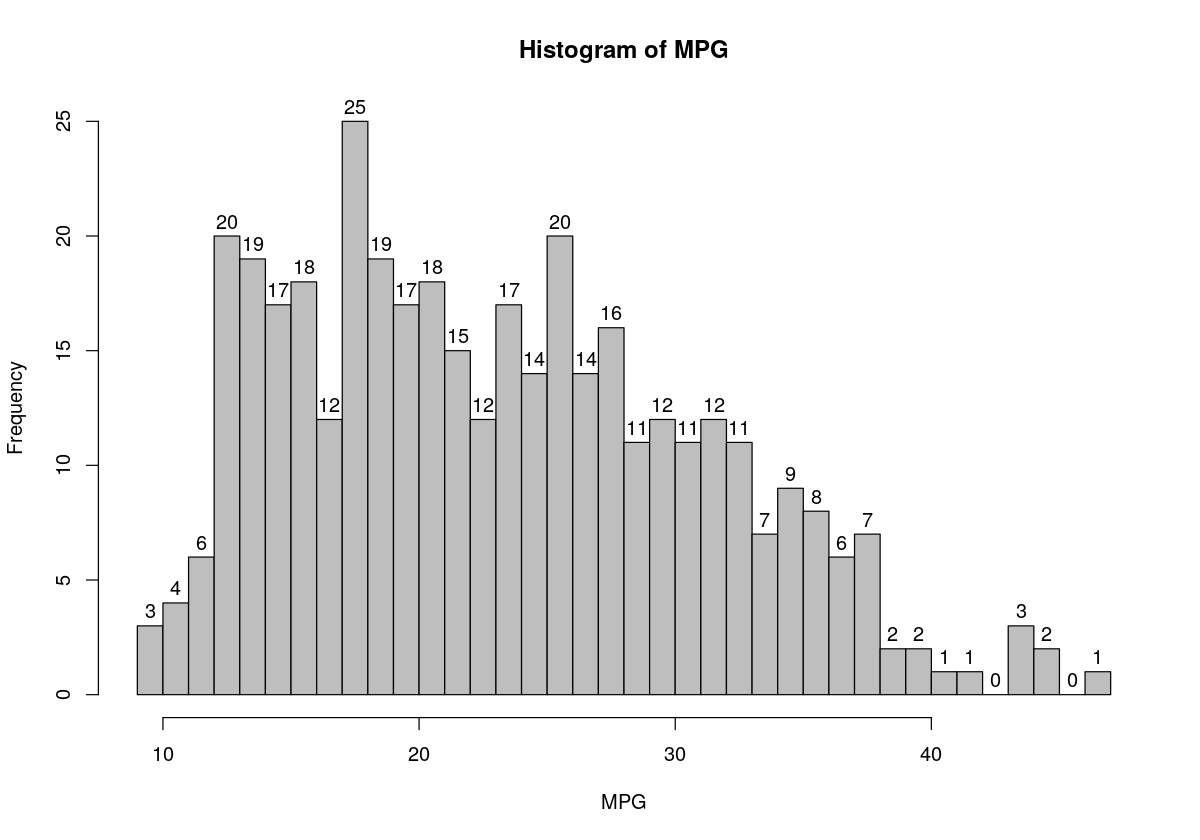

In [11]:
h <- hist(auto_mgp$mpg, 
          main="Histogram of MPG", 
          xlab="MPG",
          col="grey",
          breaks=50,
          freq=TRUE)
text(h$mids,h$counts,labels=h$counts, adj=c(0.5, -0.5))

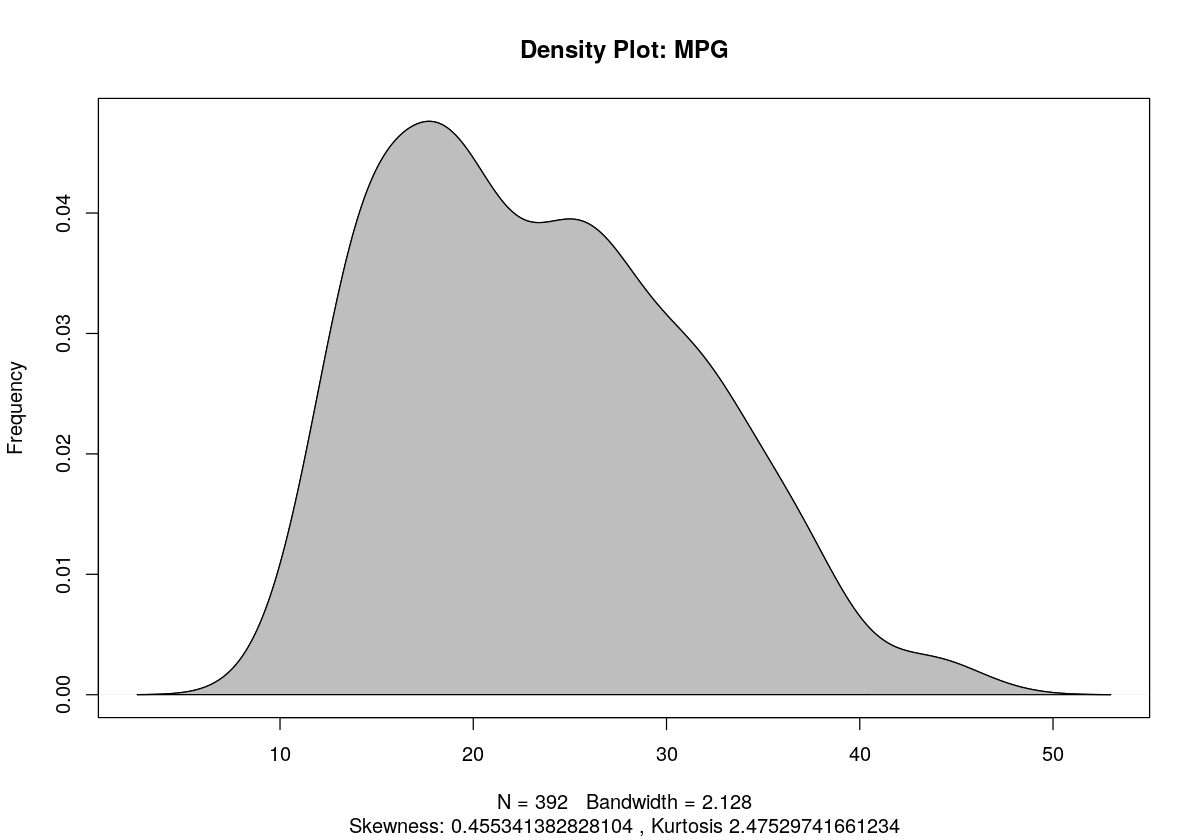

In [12]:
plot(density(auto_mgp$mpg), 
     main="Density Plot: MPG", 
     ylab="Frequency", 
     sub=paste("Skewness:", skewness(auto_mgp$mpg), 
               ", Kurtosis", kurtosis(auto_mgp$mpg)))
polygon(density(auto_mgp$mpg), col="grey")

We can observer that _mgp_ attributte it's close to a normal distribution. Skewness is 0.455 (Gaussian is 0) and Kurtosis is 2.47 (Gaussian is 3). Also, we can see with the kde and histogram plots that the most probability value of _mgp_ is around 18.


------------------------------------------------------------------------------------------------------------------

### Cylinders

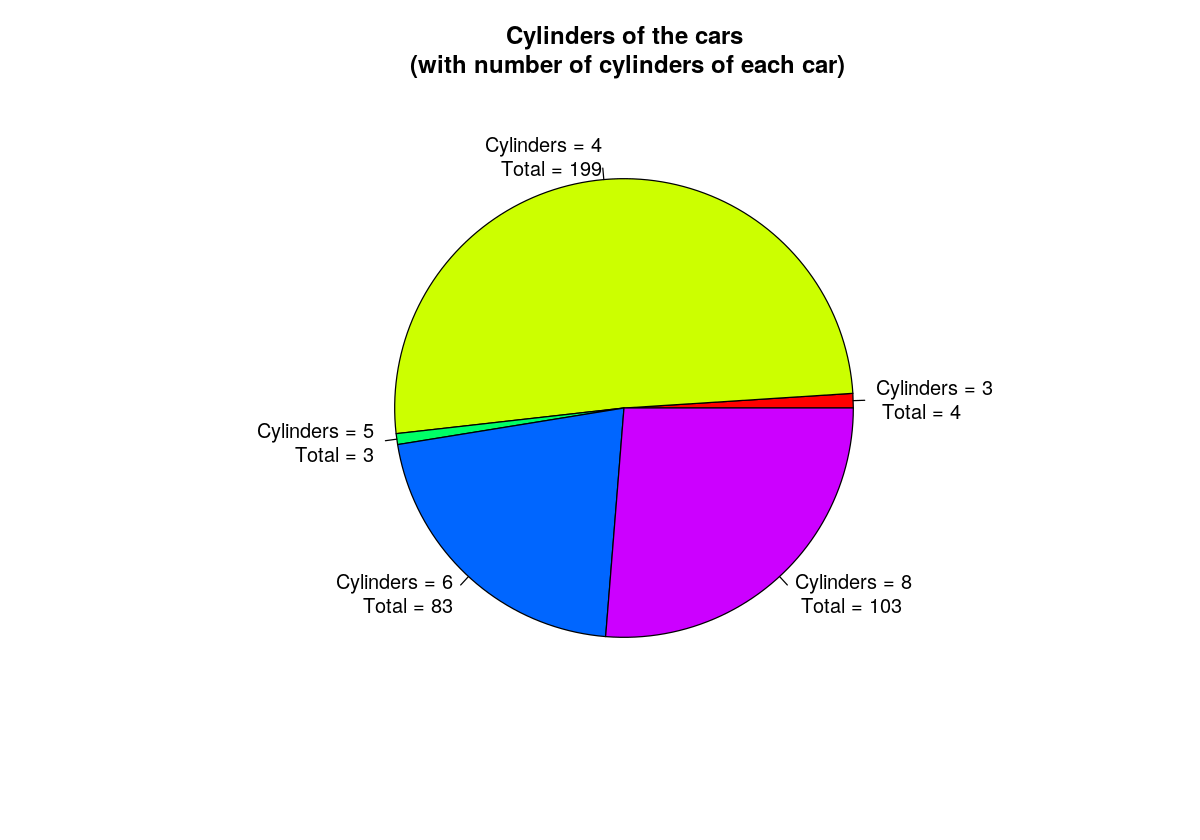

In [13]:
mytable <- table(auto_mgp$cylinders)

lbls <- paste("Cylinders = ", names(mytable), "\n Total = ", mytable, sep="")
pie(mytable, 
    labels = lbls,
    main="Cylinders of the cars\n (with number of cylinders of each car)",
   col=rainbow(length(lbls)))

For _cylinders_ attributte, we can see that the most common value of cylinders is 4, that there isn't any sample with 7 cylinders and so many with 6 and 8 cylinders.

------------------------------------------------------------------------------------------------------------------

### Displacement

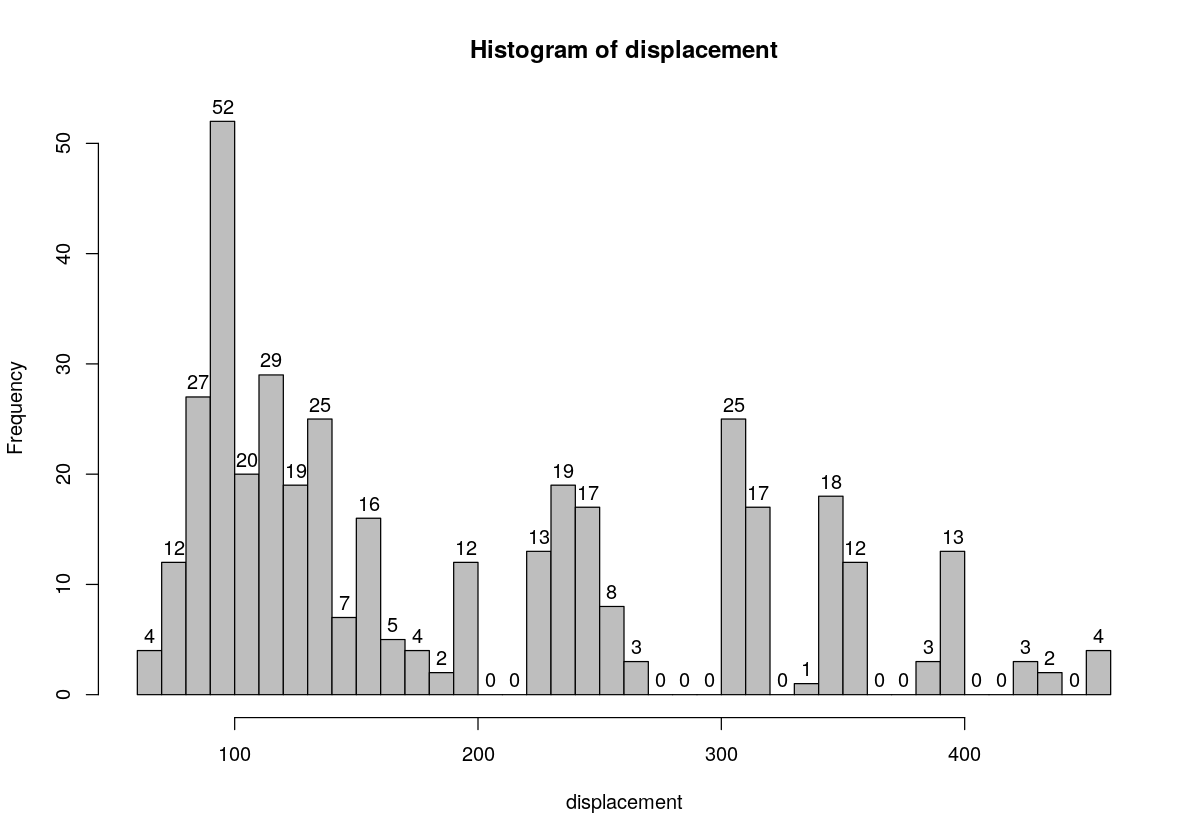

In [14]:
h <- hist(auto_mgp$displacement, 
     main="Histogram of displacement", 
     xlab="displacement",
     col="grey",
     breaks=50,
     freq=TRUE)
text(h$mids,h$counts,labels=h$counts, adj=c(0.5, -0.5))

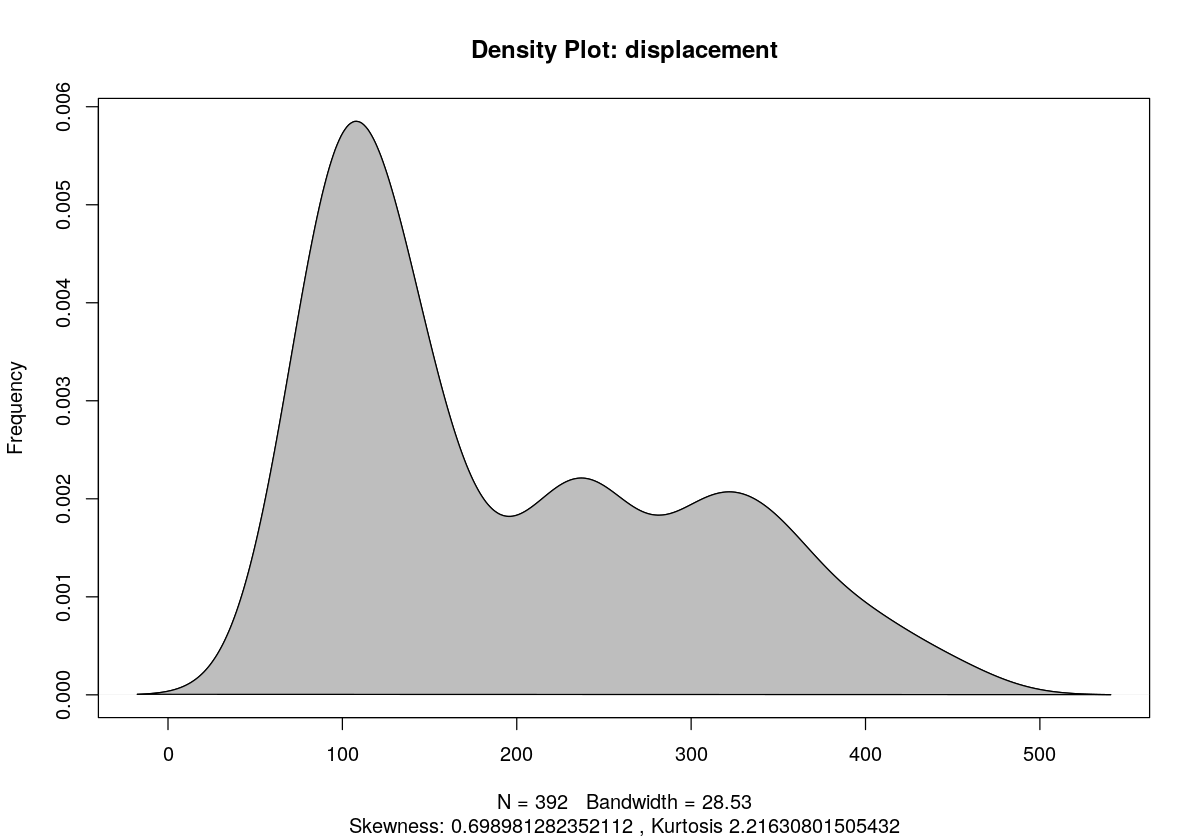

In [15]:
plot(density(auto_mgp$displacement), 
     main="Density Plot: displacement", 
     ylab="Frequency", 
     sub=paste("Skewness:", skewness(auto_mgp$displacement), 
               ", Kurtosis", kurtosis(auto_mgp$displacement)))
polygon(density(auto_mgp$displacement), col="grey")

Regarding to _displacement_ attribute, we can see that has three peaks (110, 240 and 320), this peaks probably are correlated with the number of cylinders. 

------------------------------------------------------------------------------------------------------------------

### Horsepower

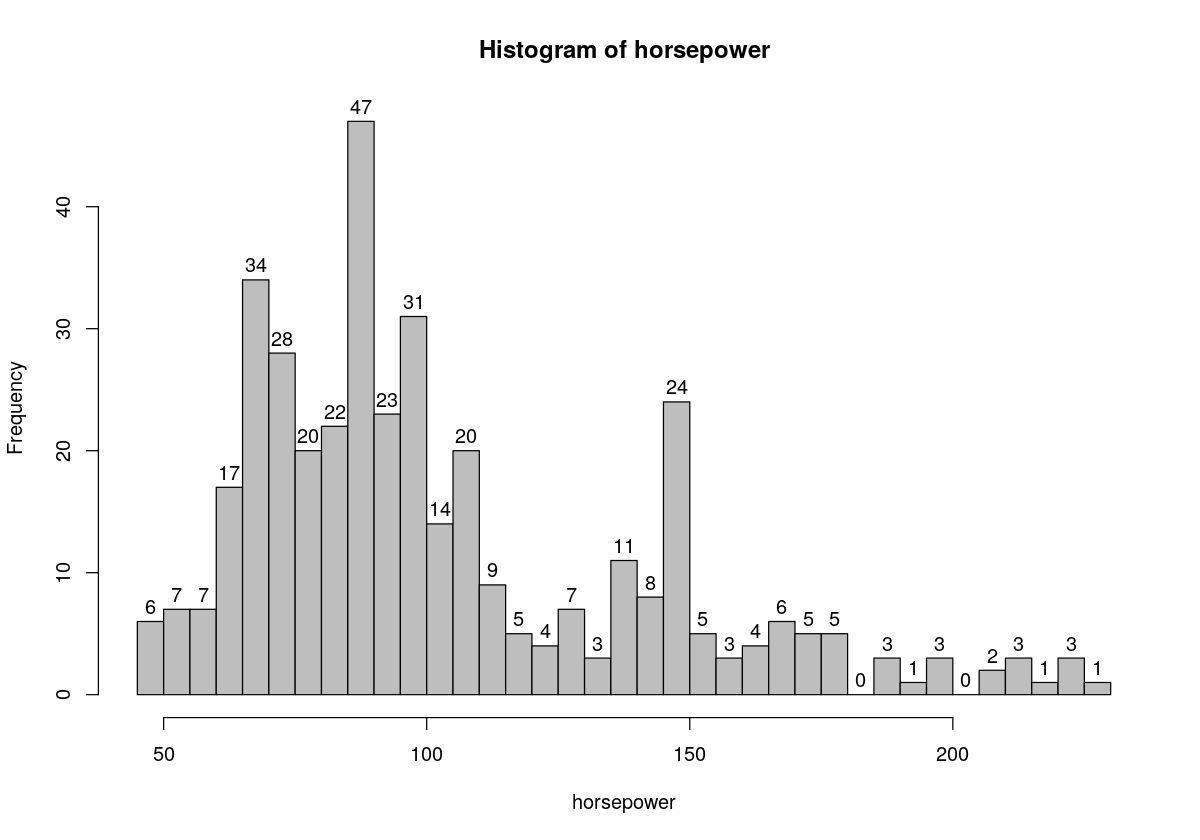

In [16]:
h <- hist(auto_mgp$horsepower, 
     main="Histogram of horsepower", 
     xlab="horsepower",
     col="grey",
     breaks=50,
     freq=TRUE)
text(h$mids,h$counts,labels=h$counts, adj=c(0.5, -0.5))

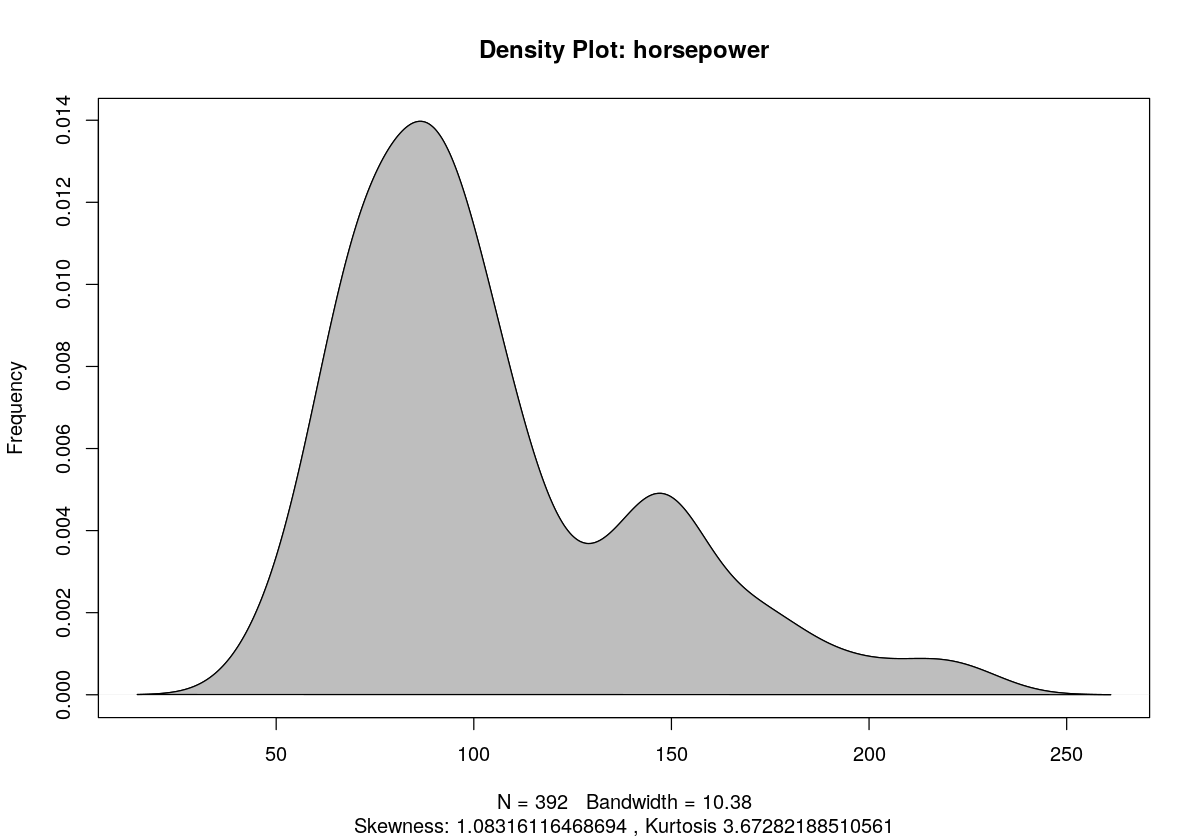

In [17]:
plot(density(auto_mgp$horsepower), 
     main="Density Plot: horsepower", 
     ylab="Frequency", 
     sub=paste("Skewness:", skewness(auto_mgp$horsepower), 
               ", Kurtosis", kurtosis(auto_mgp$horsepower)))
polygon(density(auto_mgp$horsepower), col="grey")

### Weight

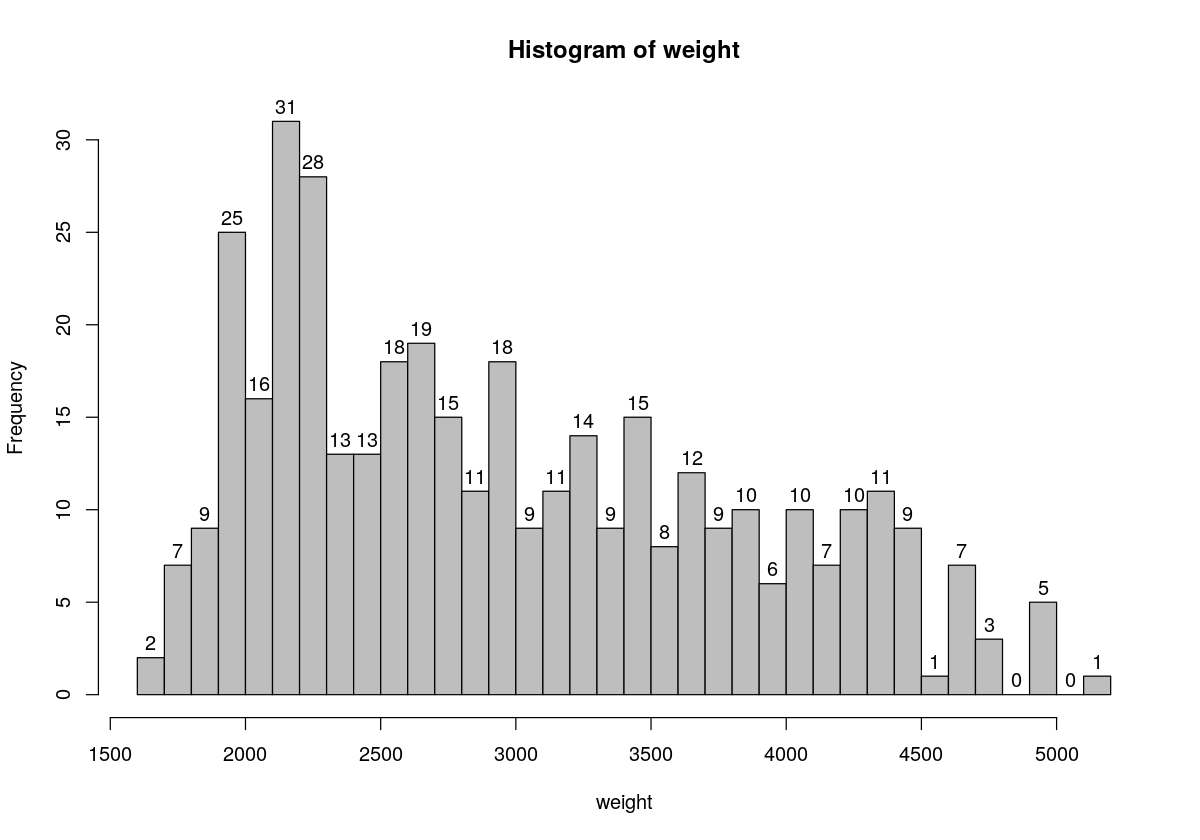

In [18]:
h <- hist(auto_mgp$weight, 
     main="Histogram of weight", 
     xlab="weight",
     col="grey",
     breaks=50,
     freq=TRUE)
text(h$mids,h$counts,labels=h$counts, adj=c(0.5, -0.5))

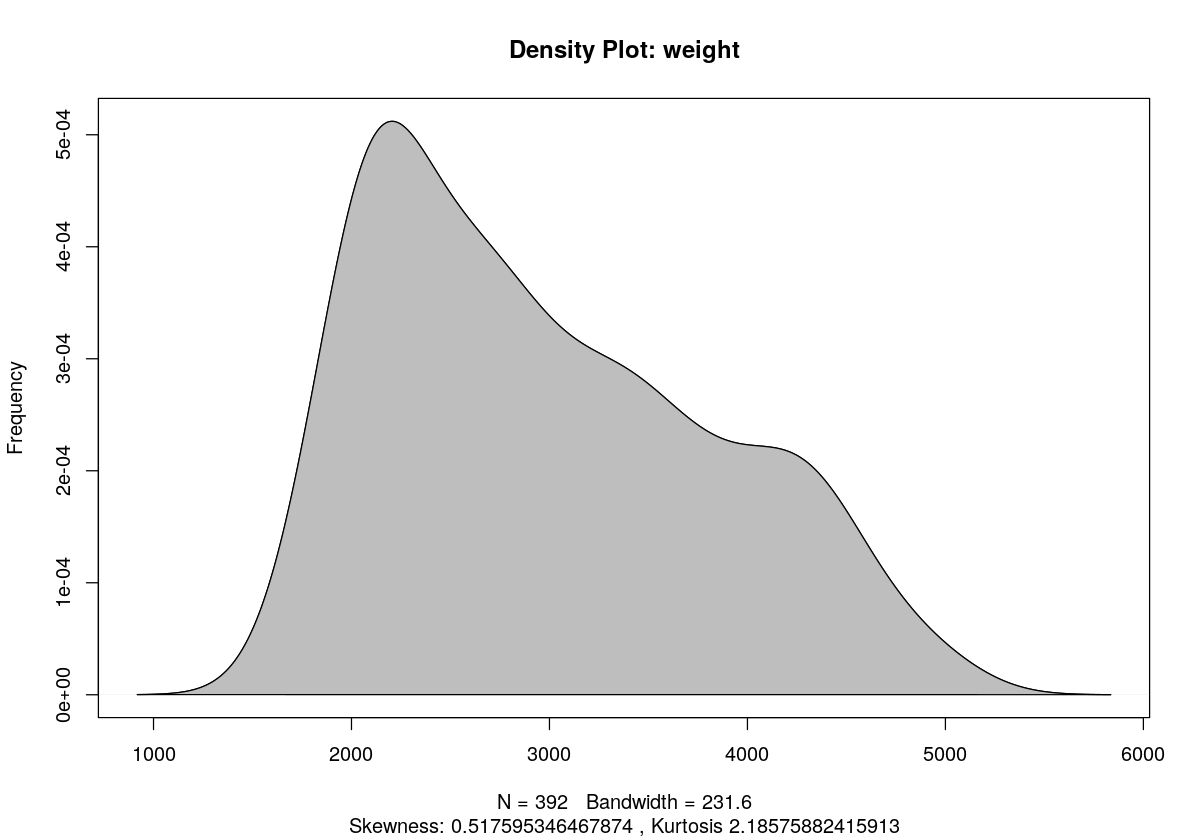

In [19]:
plot(density(auto_mgp$weight), 
     main="Density Plot: weight", 
     ylab="Frequency", 
     sub=paste("Skewness:", skewness(auto_mgp$weight), 
               ", Kurtosis", kurtosis(auto_mgp$weight)))
polygon(density(auto_mgp$weight), col="grey")

### Acceleration

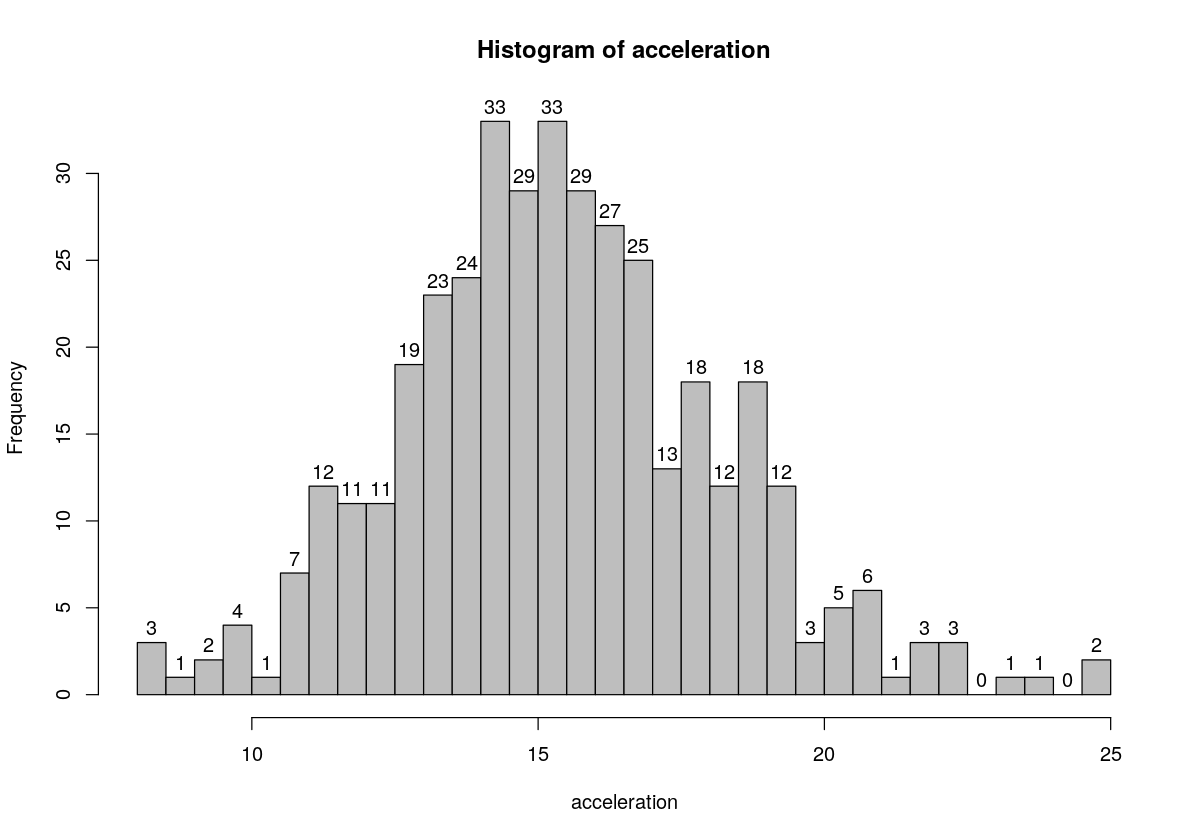

In [20]:
h <- hist(auto_mgp$acceleration, 
     main="Histogram of acceleration", 
     xlab="acceleration",
     col="grey",
     breaks=50,
     freq=TRUE)
text(h$mids,h$counts,labels=h$counts, adj=c(0.5, -0.5))

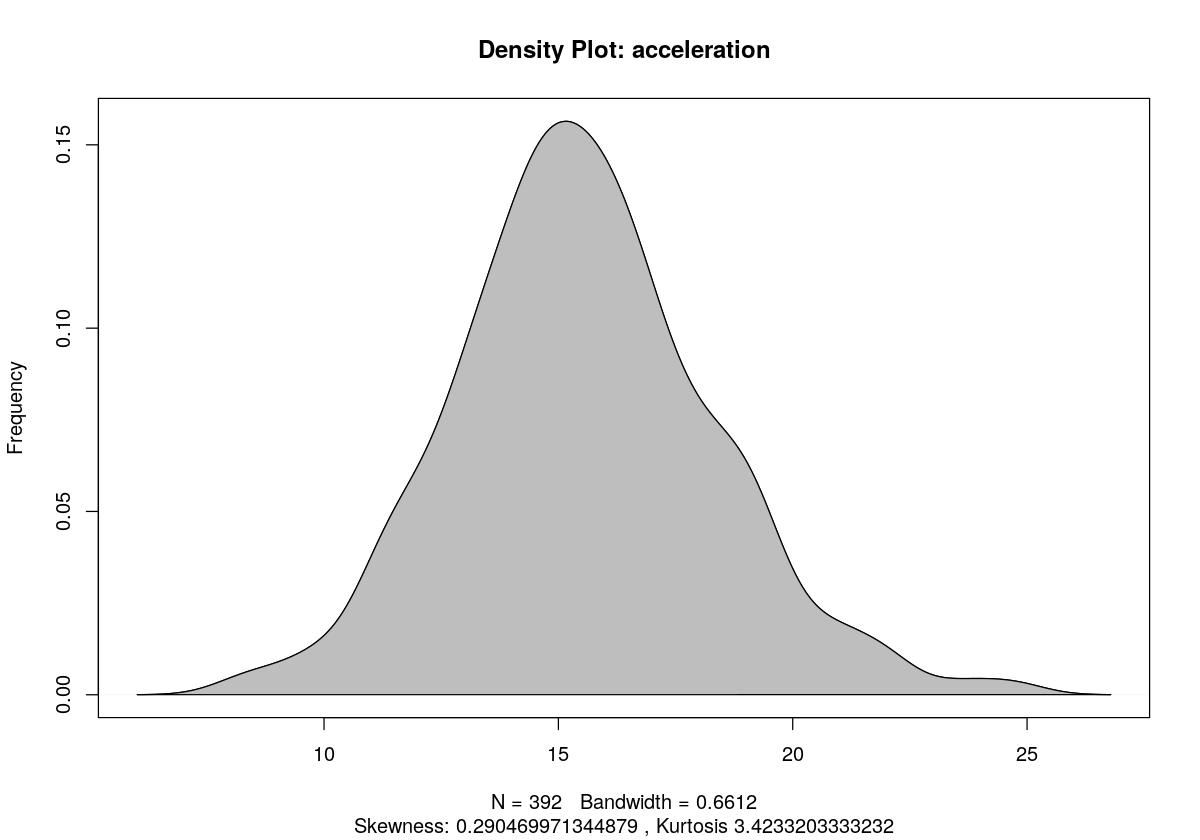

In [21]:
plot(density(auto_mgp$acceleration), 
     main="Density Plot: acceleration", 
     ylab="Frequency", 
     sub=paste("Skewness:", skewness(auto_mgp$acceleration), 
               ", Kurtosis", kurtosis(auto_mgp$acceleration)))
polygon(density(auto_mgp$acceleration), col="grey")

### Model year

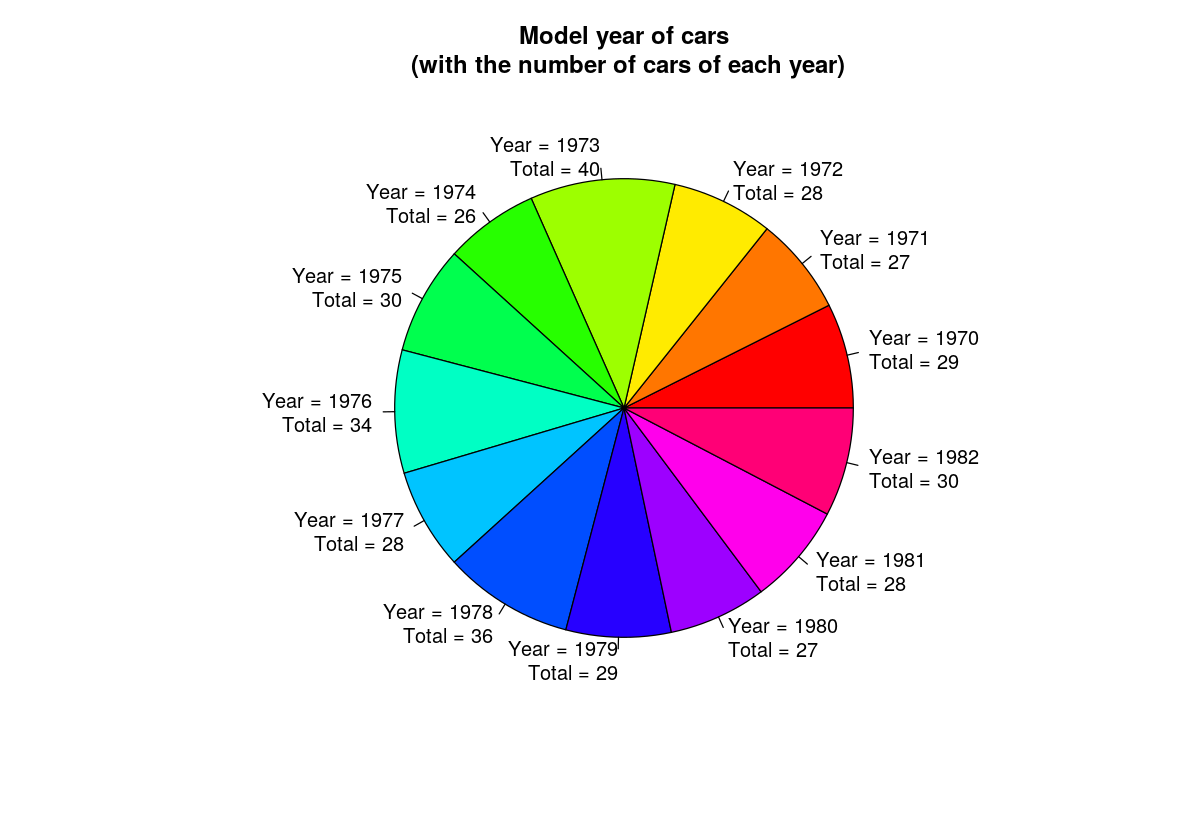

In [22]:
mytable <- table(auto_mgp$model_year)
lbls <- paste("Year = 19",names(mytable), "\nTotal = ", mytable, sep="")
pie(mytable, 
    labels = lbls,
    main="Model year of cars\n (with the number of cars of each year)",
   col=rainbow(length(lbls)))

### Origin

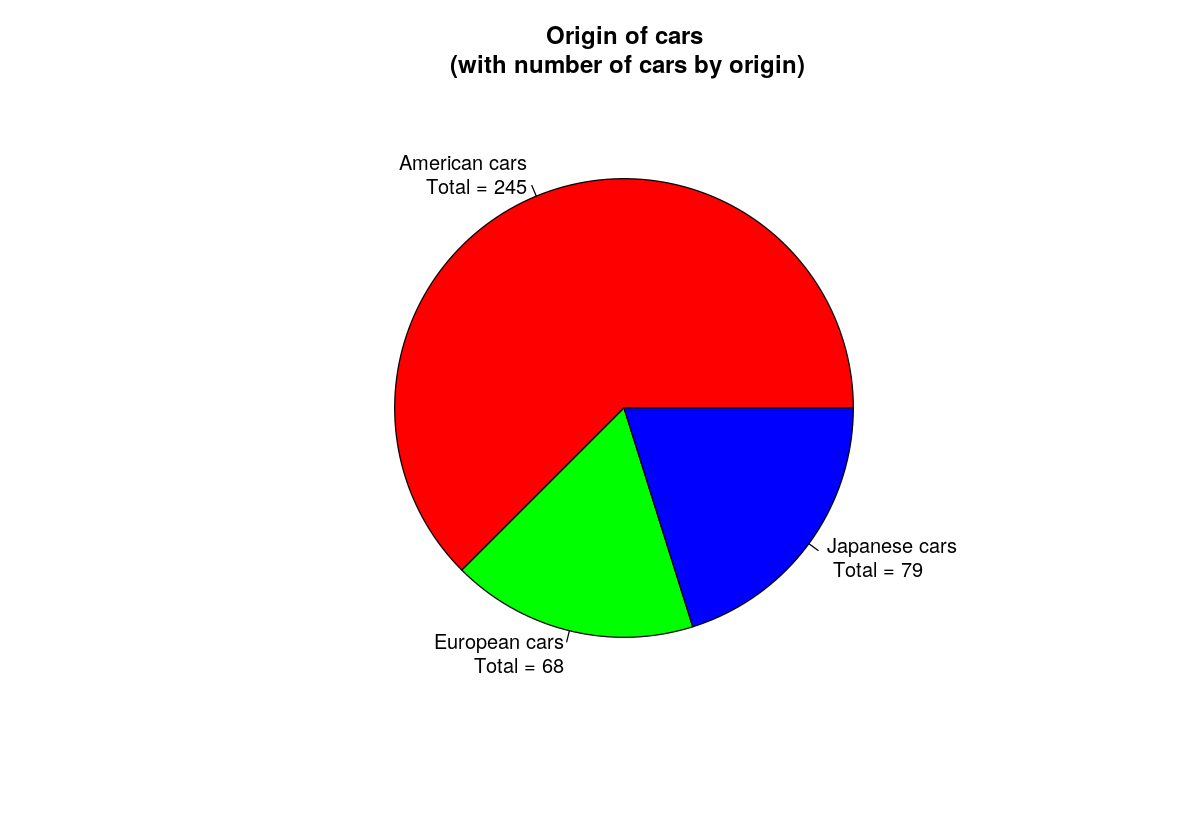

In [23]:
mytable <- table(auto_mgp$origin)

lbls <- paste(c("American cars", "European cars", "Japanese cars"), "\n Total = ", mytable, sep="")
pie(mytable, 
    labels = lbls,
    main="Origin of cars\n (with number of cars by origin)",
   col=rainbow(length(lbls)))

## Scatter plot

To close this section, we are going to use scatter plot representation to show  the relationship between MPG and the rest of variables in the dataset.

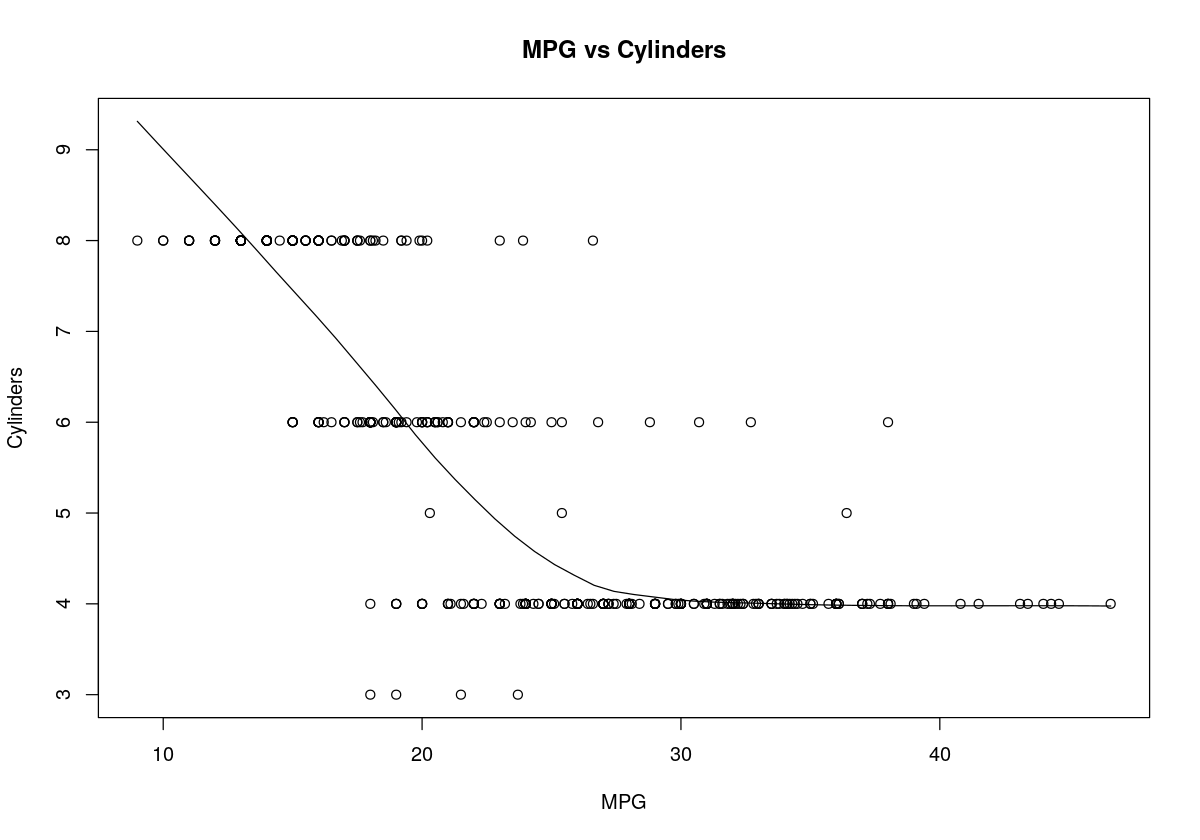

In [24]:
scatter.smooth(x=auto_mgp$mpg, 
               y=auto_mgp$cylinders, 
               main="MPG vs Cylinders",
               xlab = "MPG", 
               ylab = "Cylinders")

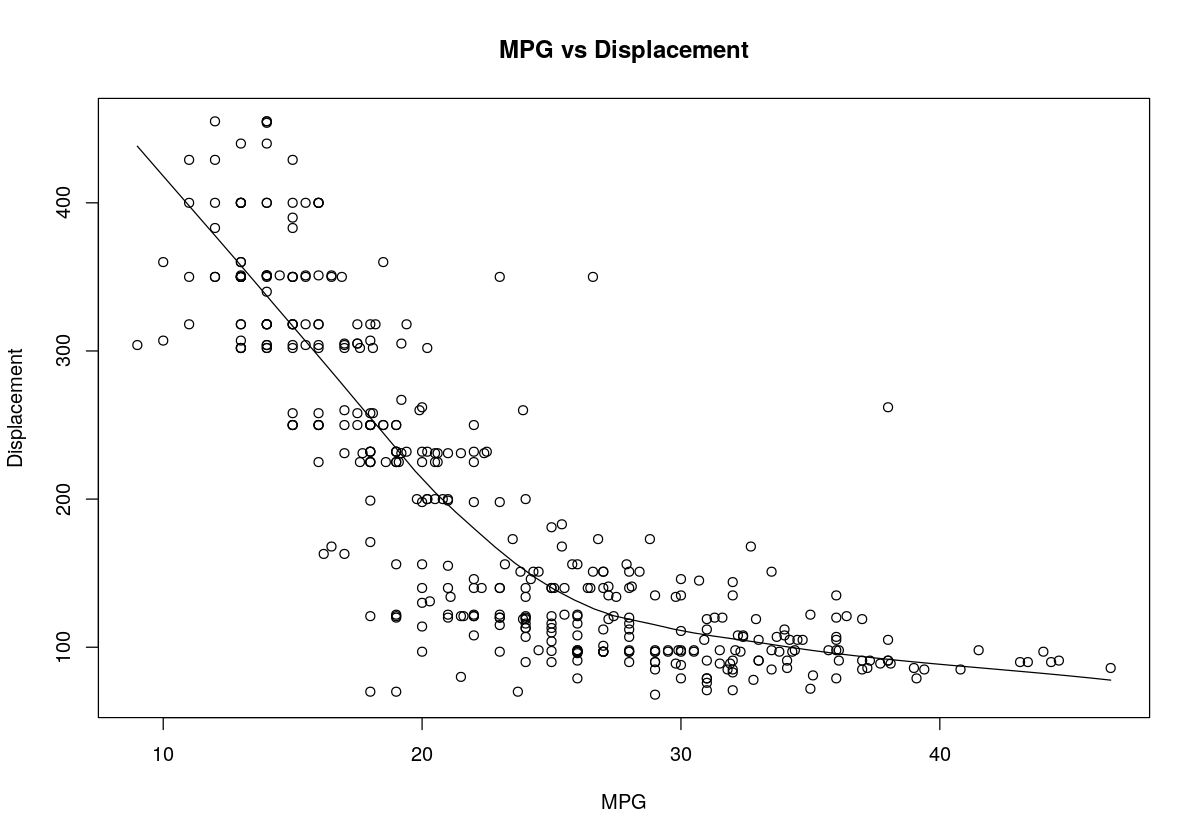

In [25]:
scatter.smooth(x=auto_mgp$mpg, 
               y=auto_mgp$displacement, 
               main="MPG vs Displacement", 
               xlab = "MPG", 
               ylab = "Displacement")

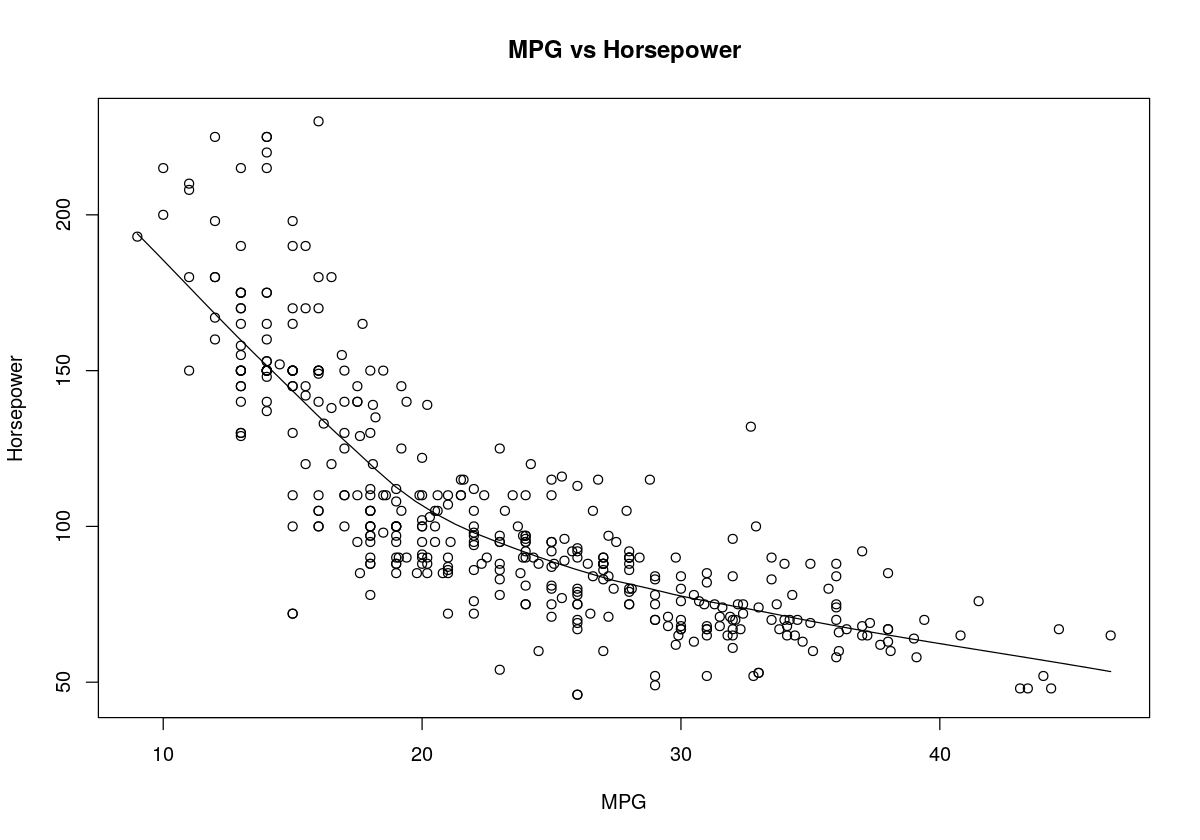

In [26]:
scatter.smooth(x=auto_mgp$mpg, 
               y=auto_mgp$horsepower, 
               main="MPG vs Horsepower", 
               xlab = "MPG", 
               ylab = "Horsepower")

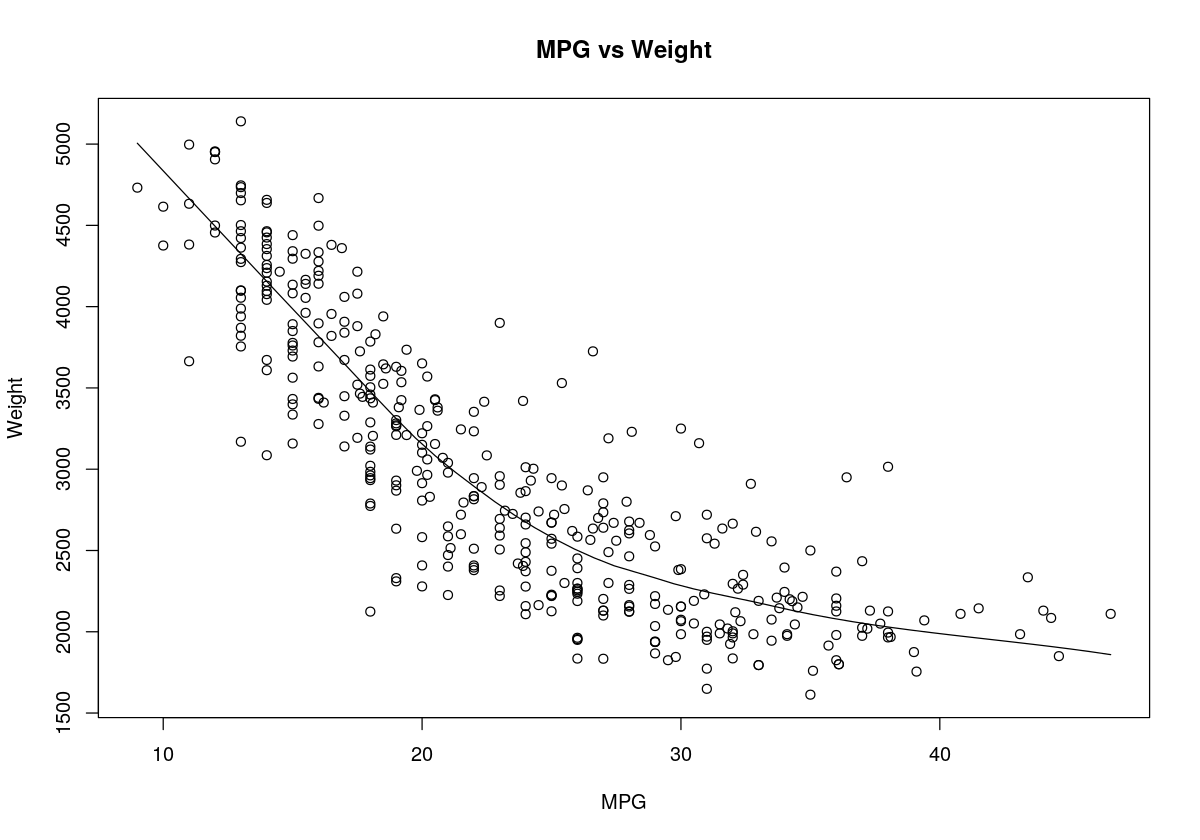

In [27]:
scatter.smooth(x=auto_mgp$mpg, 
               y=auto_mgp$weight, 
               main="MPG vs Weight", 
               xlab = "MPG", 
               ylab = "Weight")

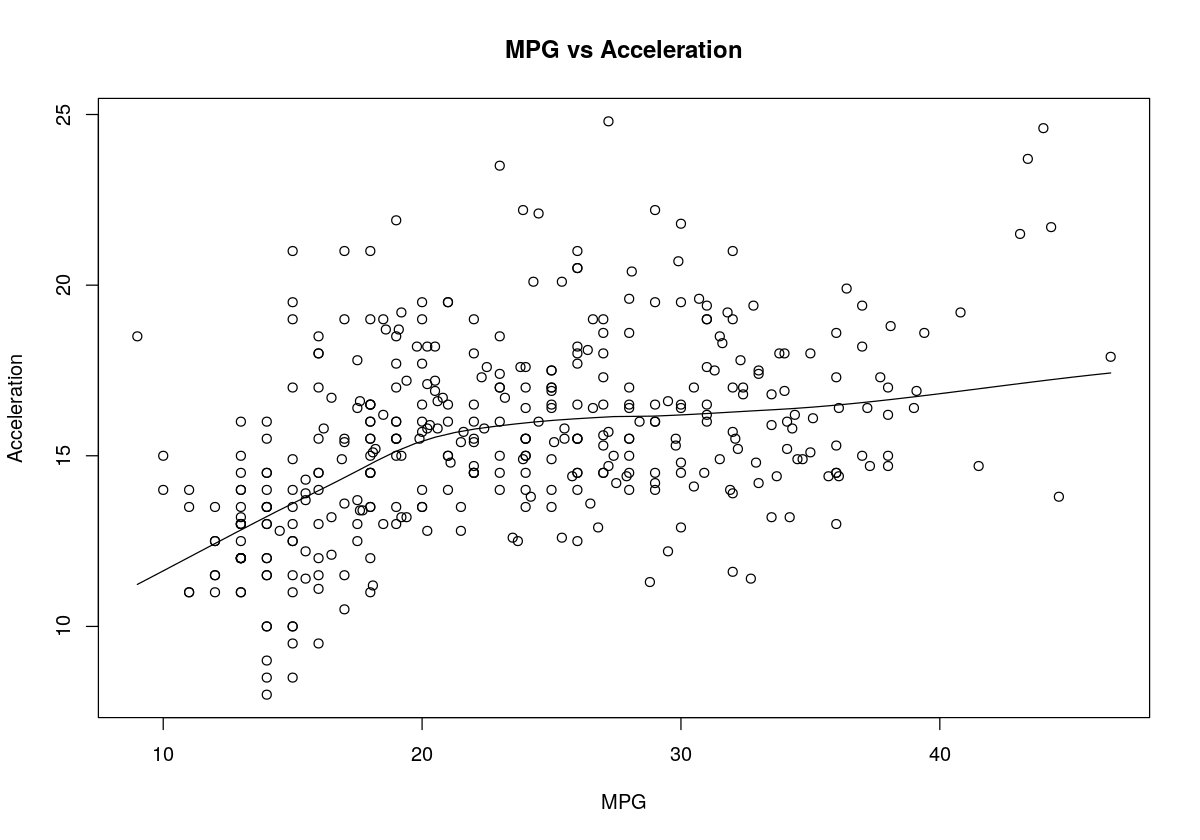

In [28]:
scatter.smooth(x=auto_mgp$mpg, 
               y=auto_mgp$acceleration, 
               main="MPG vs Acceleration", 
               xlab = "MPG", 
               ylab = "Acceleration")

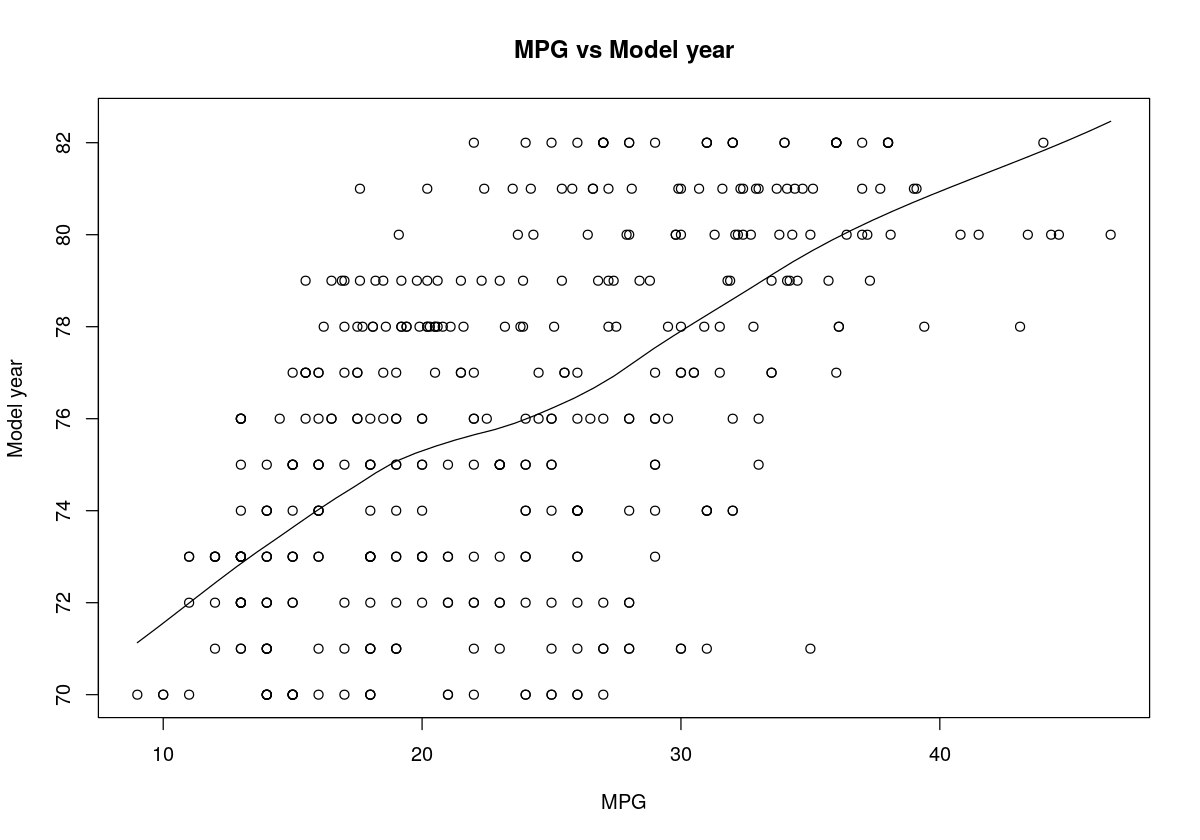

In [29]:
scatter.smooth(x=auto_mgp$mpg, 
               y=auto_mgp$model_year, 
               main="MPG vs Model year", 
               xlab = "MPG", 
               ylab = "Model year")

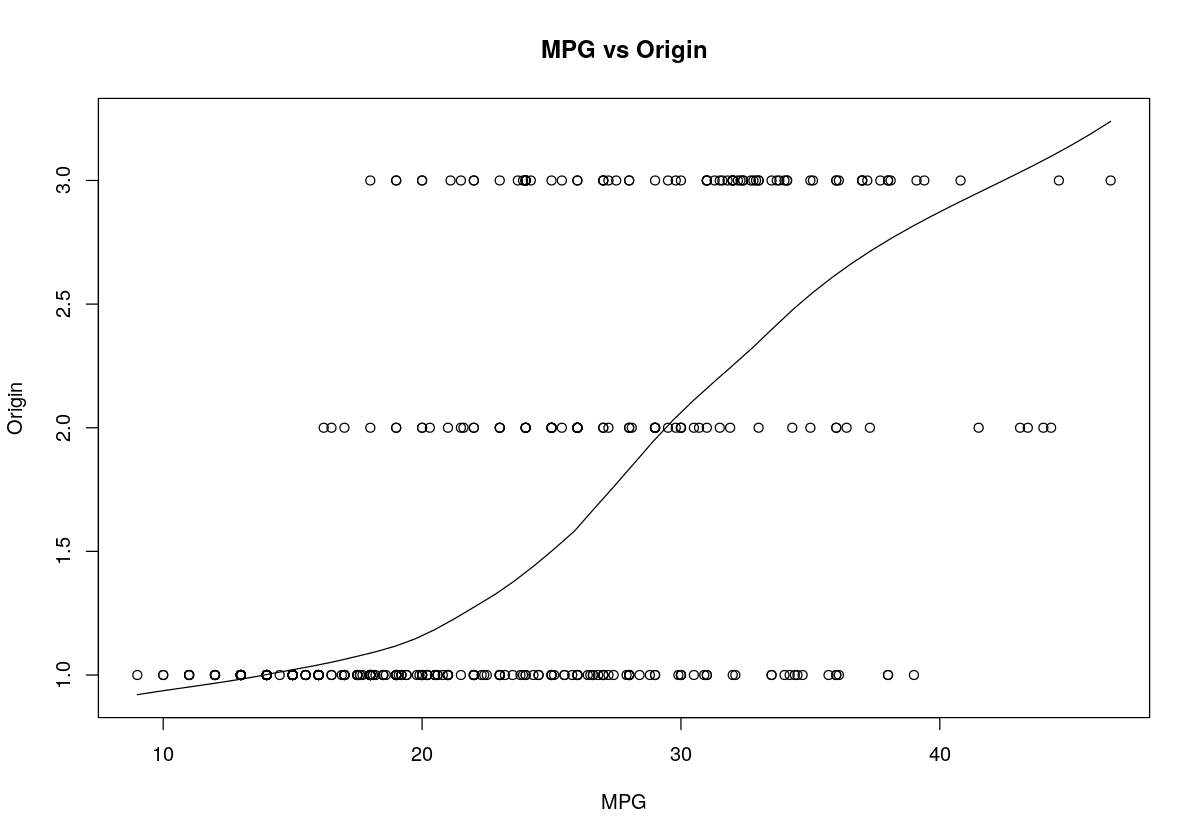

In [30]:
scatter.smooth(x=auto_mgp$mpg, 
               y=auto_mgp$origin, 
               main="MPG vs Origin", 
               xlab = "MPG", 
               ylab = "Origin")

# Linear regression

## Introduction

Linear regression is used to predict the value of an outcome variable Y based on one or more input predictor variables X. The aim is to establish a linear relationship (a mathematical formula) between the predictor variable(s) and the response variable, so that, we can use this formula to estimate the value of the response Y, when only the predictors (Xs) values are known.

This mathematical equation can be generalized as follows:


$Y = \beta_1 + \beta_2X + \epsilon$

where, $\beta_1$ is the intercept and $\beta_2$ is the slope. Collectively, they are called regression coefficients. $\epsilon$ is the error term, the part of Y the regression model is unable to explain.

<img src="http://r-statistics.co/screenshots/linear-regression-small.png" width="400">

## Build the model

Now, we are going to analyze what variables use in the linear regresion model in order to obtain the most significant input variables to predict the fuel consumption of the cars.

In [31]:
fit <- lm(auto_mgp$mpg ~ ., 
          data=auto_mgp)
summary(fit)


Call:
lm(formula = auto_mgp$mpg ~ ., data = auto_mgp)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
model_year     0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


**Note:** It seems that, accordinf to the linear regresion model, the most significant variables for predict the fuel consumption are: **displacement**, **weight**, **model_year** and **origin**. Curiously, according to this results, **horsepower** and **acceleration** are not significant variables. Since we think a priori that this variables should have influence in the fuel consumption of a car, we are going to investigate what happens here.

In [32]:
fit <- lm(auto_mgp$mpg ~ 
          auto_mgp$cylinders, 
          data=auto_mgp)
summary(fit)


Call:
lm(formula = auto_mgp$mpg ~ auto_mgp$cylinders, data = auto_mgp)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2413  -3.1832  -0.6332   2.5491  17.9168 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         42.9155     0.8349   51.40   <2e-16 ***
auto_mgp$cylinders  -3.5581     0.1457  -24.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.914 on 390 degrees of freedom
Multiple R-squared:  0.6047,	Adjusted R-squared:  0.6037 
F-statistic: 596.6 on 1 and 390 DF,  p-value: < 2.2e-16


In [33]:
fit <- lm(auto_mgp$mpg ~ 
          auto_mgp$displacement, 
          data=auto_mgp)
summary(fit)


Call:
lm(formula = auto_mgp$mpg ~ auto_mgp$displacement, data = auto_mgp)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9170  -3.0243  -0.5021   2.3512  18.6128 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           35.12064    0.49443   71.03   <2e-16 ***
auto_mgp$displacement -0.06005    0.00224  -26.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.635 on 390 degrees of freedom
Multiple R-squared:  0.6482,	Adjusted R-squared:  0.6473 
F-statistic: 718.7 on 1 and 390 DF,  p-value: < 2.2e-16


In [34]:
fit <- lm(auto_mgp$mpg ~ 
          auto_mgp$horsepower, 
          data=auto_mgp)
summary(fit)


Call:
lm(formula = auto_mgp$mpg ~ auto_mgp$horsepower, data = auto_mgp)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         39.935861   0.717499   55.66   <2e-16 ***
auto_mgp$horsepower -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


In [35]:
fit <- lm(auto_mgp$mpg ~ 
          auto_mgp$weight, 
          data=auto_mgp)
summary(fit)


Call:
lm(formula = auto_mgp$mpg ~ auto_mgp$weight, data = auto_mgp)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9736  -2.7556  -0.3358   2.1379  16.5194 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     46.216524   0.798673   57.87   <2e-16 ***
auto_mgp$weight -0.007647   0.000258  -29.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.333 on 390 degrees of freedom
Multiple R-squared:  0.6926,	Adjusted R-squared:  0.6918 
F-statistic: 878.8 on 1 and 390 DF,  p-value: < 2.2e-16


In [36]:
fit <- lm(auto_mgp$mpg ~ 
          auto_mgp$acceleration, 
          data=auto_mgp)
summary(fit)


Call:
lm(formula = auto_mgp$mpg ~ auto_mgp$acceleration, data = auto_mgp)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.989  -5.616  -1.199   4.801  23.239 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.8332     2.0485   2.359   0.0188 *  
auto_mgp$acceleration   1.1976     0.1298   9.228   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.08 on 390 degrees of freedom
Multiple R-squared:  0.1792,	Adjusted R-squared:  0.1771 
F-statistic: 85.15 on 1 and 390 DF,  p-value: < 2.2e-16


In [37]:
fit <- lm(auto_mgp$mpg ~ 
          auto_mgp$model_year, 
          data=auto_mgp)
summary(fit)


Call:
lm(formula = auto_mgp$mpg ~ auto_mgp$model_year, data = auto_mgp)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0212  -5.4411  -0.4412   4.9739  18.2088 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -70.01167    6.64516  -10.54   <2e-16 ***
auto_mgp$model_year   1.23004    0.08736   14.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.363 on 390 degrees of freedom
Multiple R-squared:  0.337,	Adjusted R-squared:  0.3353 
F-statistic: 198.3 on 1 and 390 DF,  p-value: < 2.2e-16


In [38]:
fit <- lm(auto_mgp$mpg ~ 
          auto_mgp$origin, 
          data=auto_mgp)
summary(fit)


Call:
lm(formula = auto_mgp$mpg ~ auto_mgp$origin, data = auto_mgp)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2416  -5.2533  -0.7651   3.8967  18.7115 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      14.8120     0.7164   20.68   <2e-16 ***
auto_mgp$origin   5.4765     0.4048   13.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.447 on 390 degrees of freedom
Multiple R-squared:  0.3195,	Adjusted R-squared:  0.3177 
F-statistic: 183.1 on 1 and 390 DF,  p-value: < 2.2e-16


### Split dataset

In [39]:
# Create Training and Test data
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(auto_mgp), 0.8*nrow(auto_mgp))  # row indices for training data

trainingData <- auto_mgp[trainingRowIndex, ]  # model training data
testData  <- auto_mgp[-trainingRowIndex, ]   # test data

In [40]:
fit <- lm(trainingData$mpg ~ ., 
          data=trainingData)
summary(fit)


Call:
lm(formula = trainingData$mpg ~ ., data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4297 -1.9772 -0.0465  1.8031 13.3072 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.549e+01  5.125e+00  -3.023  0.00272 ** 
cylinders    -3.999e-01  3.738e-01  -1.070  0.28555    
displacement  1.588e-02  8.813e-03   1.802  0.07246 .  
horsepower   -2.826e-02  1.599e-02  -1.767  0.07820 .  
weight       -5.973e-03  7.206e-04  -8.288 3.69e-15 ***
acceleration -3.059e-03  1.118e-01  -0.027  0.97820    
model_year    7.475e-01  5.616e-02  13.308  < 2e-16 ***
origin        1.239e+00  3.036e-01   4.082 5.72e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.339 on 305 degrees of freedom
Multiple R-squared:  0.8074,	Adjusted R-squared:  0.8029 
F-statistic: 182.6 on 7 and 305 DF,  p-value: < 2.2e-16


In [54]:
distPred <- predict(fit, testData)  # predict distance

head(distPred)
head(testData)

8         9        10        13        17        22 
10.000706  9.276826 12.672537 14.490349 19.472148 22.305235

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
8,14,8,440,215,4312,8.5,70,1
9,14,8,455,225,4425,10.0,70,1
10,15,8,390,190,3850,8.5,70,1
13,15,8,400,150,3761,9.5,70,1
17,18,6,199,97,2774,15.5,70,1
22,24,4,107,90,2430,14.5,70,2


In [55]:
actuals_preds <- data.frame(cbind(actuals=testData$mpg, 
                                  predicteds=distPred))
mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))  

[1] 0.8795167